In [1]:
# Madhusmita Mukherjee 20BCE2783

In [2]:
# Importing necessary modules
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
# Obtaining the dataset
df = pd.read_csv("BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
from sklearn.preprocessing import StandardScaler
features = ['variance', 'skewness' , 'curtosis', 'entropy']
x = df.loc[:, features].values
y = df.loc[:, ['class']].values
x = StandardScaler().fit_transform(x)

In [5]:
# peform pca
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4'])

In [6]:
# Combine the Target and the Principal Components
classDataframe = df[['class']]
newDataframe = pd.concat([principalDataframe, classDataframe],axis = 1)
newDataframe

,PC1,PC2,PC3,PC4,class
0,-1.472805,-1.163917,-0.167253,0.325724,0
1,-1.639441,-1.093812,0.371187,0.150864,0
2,0.513919,-1.324880,0.509112,-0.425933,0
3,-2.310952,-0.202514,0.540781,-0.143794,0
4,1.193416,0.024654,0.421189,-0.364493,0
...,...,...,...,...,...
1367,-0.221995,-0.290458,-0.512657,-0.375023,1
1368,1.909395,0.142149,-0.091369,0.057992,1
1369,4.049327,2.036023,1.785924,0.094647,1
1370,3.019617,1.392140,0.681479,0.241254,1


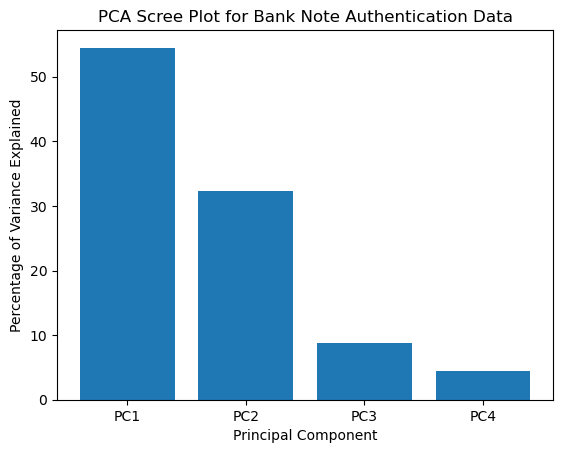

In [7]:
# Perform a Scree Plot of the Principal Components

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4']
plt.bar(x= range(1,len(percent_variance)+1), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot for Bank Note Authentication Data')
plt.show()

Text(0, 0.5, 'PC2')

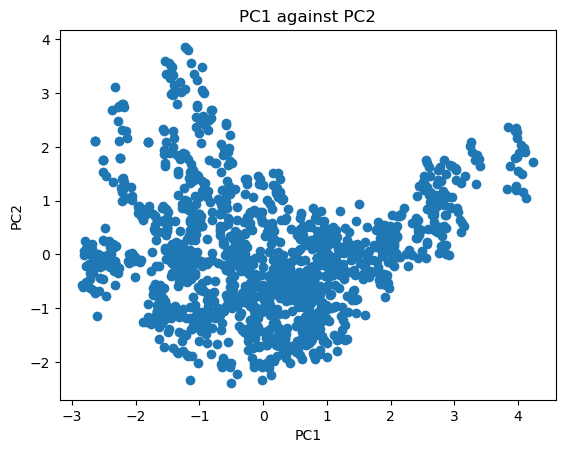

In [8]:
# Plot the Principal Components on 2D
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [9]:
pca.explained_variance_ratio_

array([0.54497602, 0.32328872, 0.08784561, 0.04388965])